In [1]:
# Check version inside your Python program
from platform import python_version
print(python_version())

3.6.9


In [2]:
import cv2
import numpy as np
import skimage

# Libreria para graficar
from matplotlib import pyplot as plt

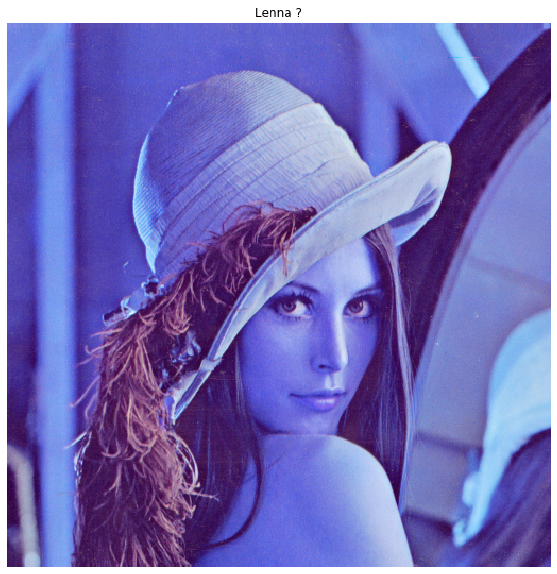

In [3]:
# Cargar la imagen con imread
image = cv2.imread('imgs/Lenna.png') 

# Graficamos la imagen utilizando matplotlib
plt.figure(figsize=(20,10)) # Cambiamos el tamaño de la imagen
plt.imshow(image)           # Seleccionamos la variable a grafica
plt.title('Lenna ?')
plt.axis('off')             # Quitamos los ejes
plt.show()                  # Finalmente se grafica

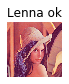

In [10]:
image = cv2.imread('imgs/Lenna.png') 

# Por defecto OpenCV carga las imagenes en formato BGR en vez de RGB
# por lo que es necesario realizar un cambio de espacio de imagen
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10,10)) 
plt.imshow(image)           
plt.title('Lenna ok')
plt.axis('off')             
plt.show()                  

In [8]:
print(image.shape)

(512, 512, 3)


(512, 512)


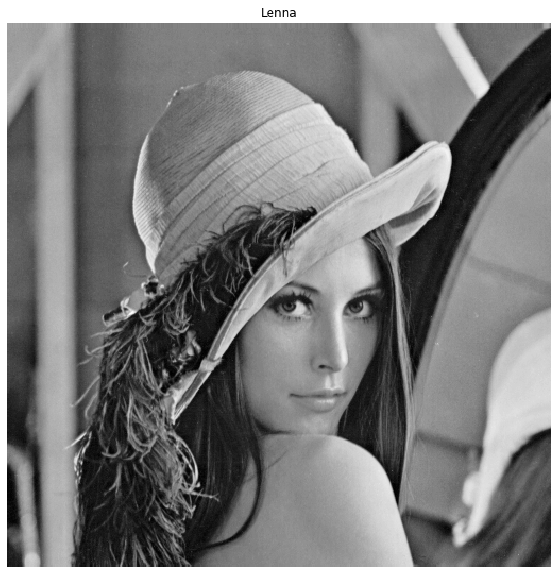

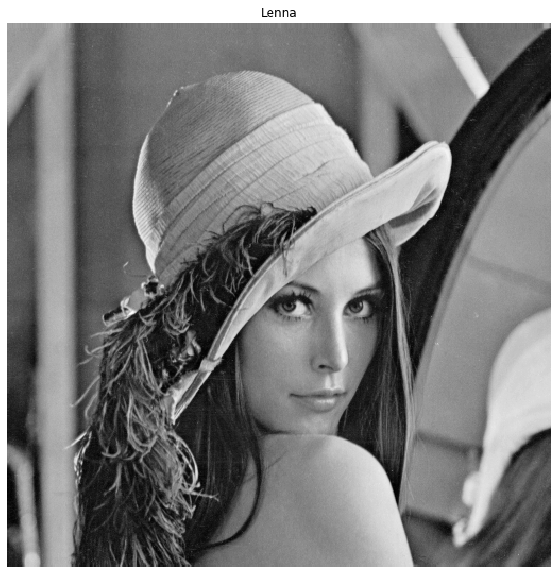

In [9]:
image = cv2.imread('imgs/Lenna.png') 

# Como vamos a realizar una umbralizacion es necesario cargar la imagen 
# en escala de grises, para esto existen dos formas.

# Primera es cargar la imagen con la opcion 0 o cv2.IMREAD_GRAYSCALE 
# https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html

image = cv2.imread('imgs/Lenna.png', 0)
image = cv2.imread('imgs/Lenna.png', cv2.IMREAD_GRAYSCALE)

print(image.shape)

plt.figure(figsize=(20,10)) 
plt.imshow(image, cmap='gray')   # Es necesario definir que estamos usando escala de grises   
plt.title('Lenna')
plt.axis('off')             
plt.show()  

# La segunda es cargarla normalmente y utilizar la funcion cvtColor
image = cv2.imread('imgs/Lenna.png') 
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20,10)) 
plt.imshow(image, cmap='gray')   # Es necesario definir que estamos usando escala de grises   
plt.title('Lenna')
plt.axis('off')             
plt.show() 

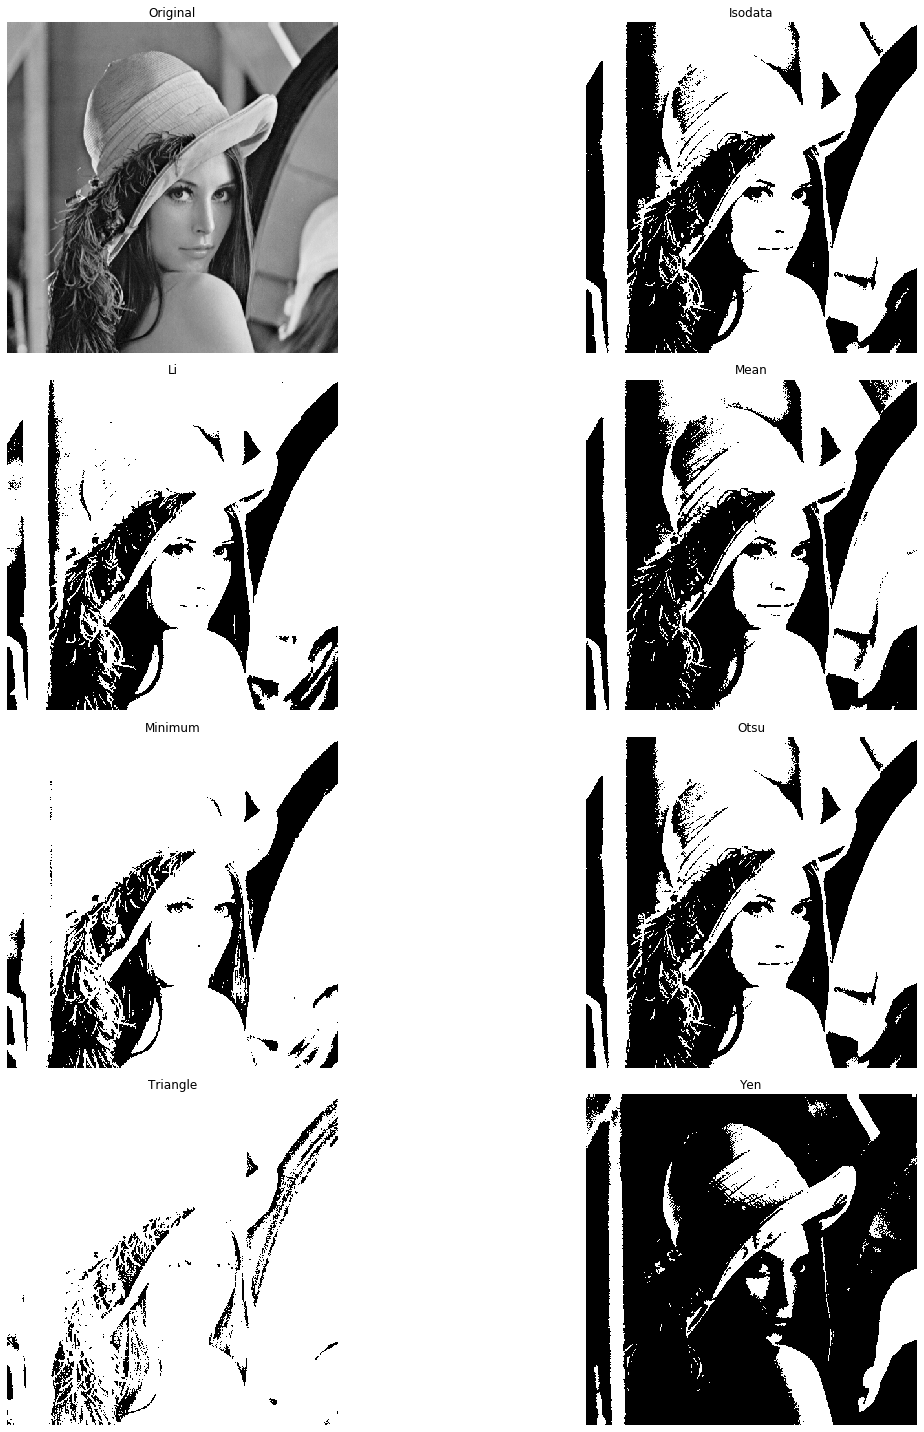

In [6]:
from skimage.filters import try_all_threshold

image = cv2.imread('imgs/Lenna.png', cv2.IMREAD_GRAYSCALE)

# Utilizamos la función de SkImage para ver el resultado de 
# algunas umbralizaciones globales
fig, ax = try_all_threshold(image, figsize=(20, 20), verbose=False)
plt.show()

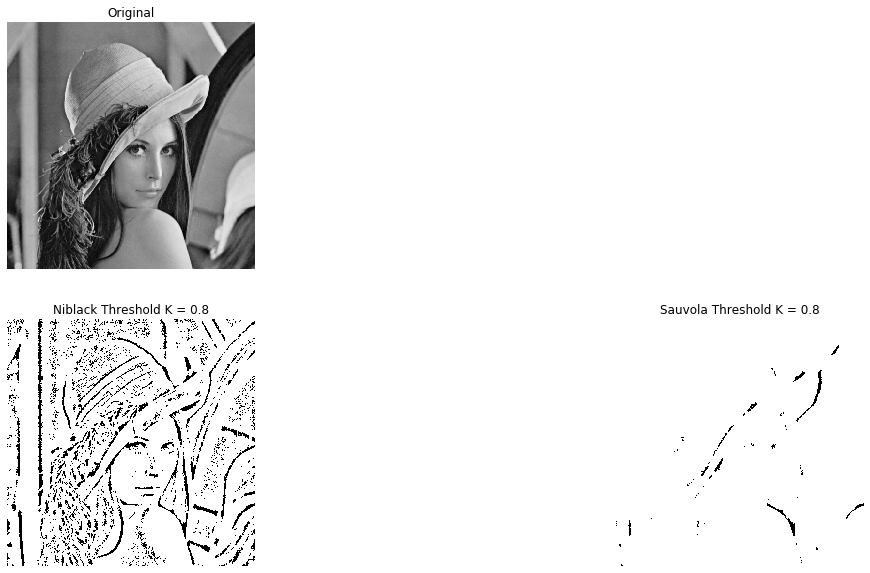

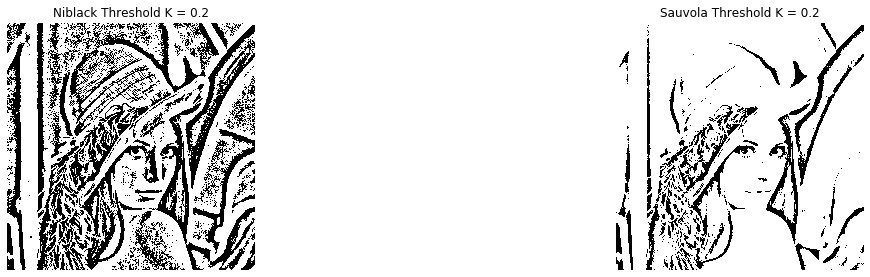

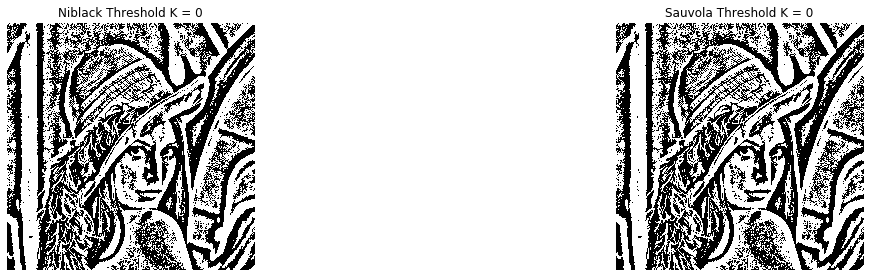

In [7]:
from skimage.filters import threshold_niblack, threshold_sauvola

image = cv2.imread('imgs/Lenna.png', cv2.IMREAD_GRAYSCALE)

# Para probar los umbralizadores locales es necesario definir
# el tamaño del vecindario que se va a revisar
window_size = 25

# Se hallan una matriz con los valores de los umbrales
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8) # Es un parametro para pesar la
                                                                          # desviación estandar del vecindario
thresh_sauvola = threshold_sauvola(image, window_size=window_size, k=0.8) 

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola

# Para hacer una misma figura con varias imagenes se utiliza
# el comando plt.subplot

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1) # El primer numero es la cantidad de imagenes por columna
                     # El segundo es la cantidad de imagenes por fila
                     # El tercero es el numero de la imagen actual enumerando por filas de izquierda a derecha y de arriba a abajo
                
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold K = 0.8')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold K = 0.8')
plt.axis('off')

plt.show()

# Con diferente K
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.2) # Es un parametro para pesar la
                                                                          # desviación estandar del vecindario
thresh_sauvola = threshold_sauvola(image, window_size=window_size, k=0.2) 

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola

plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.subplot(2, 2, 1)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold K = 0.2')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold K = 0.2')
plt.axis('off')

plt.show()

# Con diferente K
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.0) # Es un parametro para pesar la
                                                                          # desviación estandar del vecindario
thresh_sauvola = threshold_sauvola(image, window_size=window_size, k=0.0) 

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola

plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.subplot(2, 2, 1)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold K = 0')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold K = 0')
plt.axis('off')

plt.show()

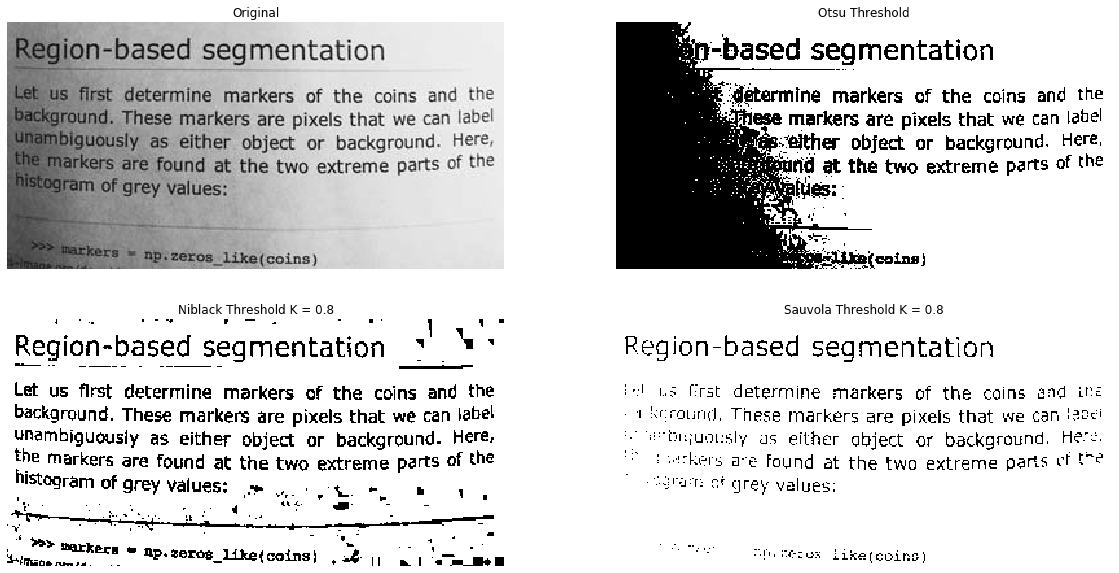

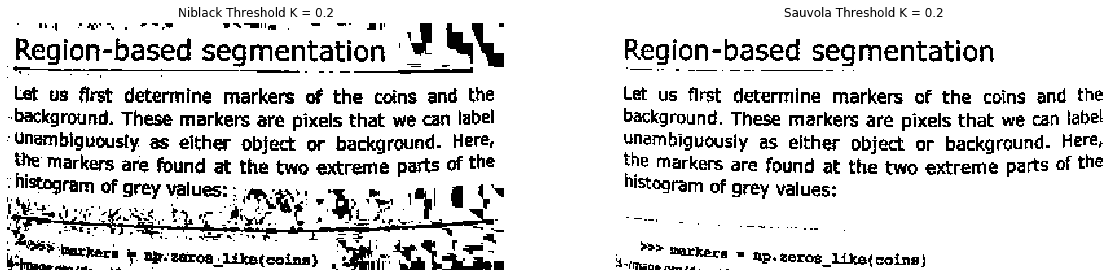

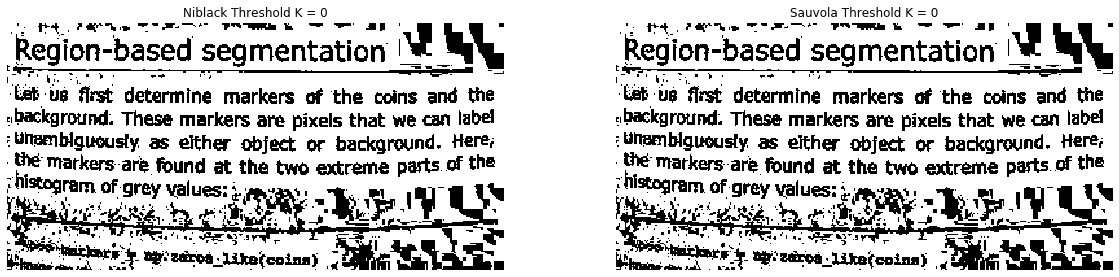

In [8]:
from skimage.filters import threshold_otsu
from skimage.data import page

image = page()

#  Para realizar la comparacion tambien se utiliza el umbral global de Otsu
binary_global = image > threshold_otsu(image)

window_size = 25

thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.8) 
thresh_sauvola = threshold_sauvola(image, window_size=window_size, k=0.8) 

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola

plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.imshow(image, cmap=plt.cm.gray)
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Otsu Threshold')
plt.imshow(binary_global, cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold K = 0.8')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold K = 0.8')
plt.axis('off')

plt.show()

# Con diferente K
thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.2)
thresh_sauvola = threshold_sauvola(image, window_size=window_size, k=0.2) 

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola

plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.subplot(2, 2, 1)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold K = 0.2')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold K = 0.2')
plt.axis('off')

plt.show()

thresh_niblack = threshold_niblack(image, window_size=window_size, k=0.0)
thresh_sauvola = threshold_sauvola(image, window_size=window_size, k=0.0) 

binary_niblack = image > thresh_niblack
binary_sauvola = image > thresh_sauvola

plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
plt.subplot(2, 2, 1)
plt.imshow(binary_niblack, cmap=plt.cm.gray)
plt.title('Niblack Threshold K = 0')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(binary_sauvola, cmap=plt.cm.gray)
plt.title('Sauvola Threshold K = 0')
plt.axis('off')

plt.show()